In [2]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import scipy

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [4]:
with open('data/pickles/29feat_formodeling.pickle','rb') as read_file:
    df = pickle.load(read_file)


In [5]:
df.head(5)

Student_Count_Total  Zip_Mean_Income  Fully Accessible  \
0                 1739          53353.0                 0   
1                 1706          57770.0                 0   
2                  742          53353.0                 0   
3                  745          57770.0                 0   
4                  199          53353.0                 0   

   Generally accessible  Student_Count_Asian_perc  \
0                     1                     0.003   
1                     1                     0.006   
2                     0                     0.000   
3                     0                     0.000   
4                     0                     0.000   

   Student_Count_Asian_Pacific_Islander_perc  Student_Count_Black_perc  \
0                                        0.0                     0.033   
1                                        0.0                     0.031   
2                                        0.0                     0.032   
3                                        0.0                     0.019   
4                                        0.0                     0.774   

   Student_Count_English_Learners_perc  \
0                                0.190   
1                                0.201   
2                                0.228   
3                                0.286   
4                                0.010   

   Student_Count_Ethnicity_Not_Available_perc  \
0                                       0.006   
1                                       0.008   
2                                       0.000   
3                                       0.001   
4                                       0.000   

   Student_Count_Hawaiian_Pacific_Islander_perc  Student_Count_Hispanic_perc  \
0                                           0.0                        0.945   
1                                           0.0                        0.943   
2                                           0.0                        0.962   
3                                           0.0                        0.974   
4                                           0.0                        0.181   

   Student_Count_Low_Income_perc  Student_Count_Multi_perc  \
0                          0.954                     0.002   
1                          0.626                     0.004   
2                          0.970                     0.000   
3                          0.930                     0.000   
4                          0.874                     0.000   

   Student_Count_Native_American_perc  Student_Count_Other_Ethnicity_perc  \
0                               0.003                                 0.0   
1                               0.004                                 0.0   
2                               0.001                                 0.0   
3                               0.003                                 0.0   
4                               0.015                                 0.0   

   Student_Count_Special_Ed_perc  Student_Count_White_perc  \
0                          0.162                     0.007   
1                          0.162                     0.006   
2                          0.197                     0.004   
3                          0.196                     0.003   
4                          0.291                     0.030   

   Classroom_Languages_count  Blue  Brown  Green  Orange  Pink  Purple  Red  \
0                          2     1      0      0       0     1       0    1   
1                          2     1      0      0       0     1       0    1   
2                          1     1      0      0       1     1       0    0   
3                          1     1      0      0       1     1       0    0   
4                          0     0      0      0       0     0       0    0   

   Dress_Code_dummie  grades_offered_count  charter  gender_f_bn  \
0                  0                     4        0            0   
1                  0   

In [6]:
len(df)

236

In [7]:
df.sort_values('log_grad_rate', ascending=True)

Student_Count_Total  Zip_Mean_Income  Fully Accessible  \
229                 1153         132877.0                 1   
231                 1918         157763.0                 0   
160                 1062          81063.0                 1   
210                 1199          35831.0                 1   
161                 1091          86237.0                 1   
38                  2156         118044.0                 0   
39                  2211         120419.0                 0   
152                 4447          90510.0                 0   
153                 4514          97946.0                 0   
228                 1072         126807.0                 1   
235                  973         172492.0                 0   
141                  381          66098.0                 1   
..                   ...              ...               ...   
204                  276          35831.0                 0   
116                  132          44893.0                 0   
222                  234          69641.0                 0   
9                     34          57770.0                 0   
8                     38          53353.0                 0   
223                  228          73909.0                 0   
102                  230          68301.0                 1   
5                    184          57770.0                 0   
4                    199          53353.0                 0   
180                  208          55246.0                 0   
181                  190          60654.0                 0   
103                  220          68047.0                 1   

     Generally accessible  Student_Count_Asian_perc  \
229                     0                     0.174   
231                     1                     0.143   
160                     0                     0.197   
210                     0                     0.040   
161                     0                     0.203   
38                      1                     0.159   
39                      1                     0.167   
152                     1                     0.105   
153                     1                     0.105   
228                     0                     0.179   
235                     1                     0.037   
141                     0                     0.008   
..                    ...                       ...   
204                     1                     0.000   
116                     0                     0.000   
222                     1                     0.021   
9                       0                     0.000   
8                       0                     0.000   
223                     1                     0.018   
102                     0                     0.043   
5                       0                     0.000   
4                       0                     0.000   
180                     0                     0.005   
181                     0                     0.005   
103                     0                     0.041   

     Student_Count_Asian_Pacific_Islander_perc  Student_Count_Black_perc  \
229                                  0.000e+00                     0.108   
231                                  1.043e-03                     0.119   
160                                  2.825e-03                     0.073   
210                                  0.000e+00                     0.538   
161                                  6.416e-03                     0.075   
38                                   0.000e+00                     0.214   
39                                   9.046e-04                     0.204   
152                                  1.349e-03                     0.079   
153                                  1.108e-03                     0.078   
228                                  0.000e+00                     0.110   
235                                  0.000e+00                     0.288   
141                    

In [8]:
#pairplot is huge, so it is saved as an svg in figures/eda.
#sns.pairplot(df)
#plt.savefig('figures/EDA/pairplot_all.svg')
df_dem_subset = df[['log_grad_rate','Student_Count_Total','Student_Count_Asian_perc',
                'Student_Count_Asian_Pacific_Islander_perc',
                'Student_Count_Black_perc','Student_Count_English_Learners_perc',
                'Student_Count_Ethnicity_Not_Available_perc',
                'Student_Count_Hawaiian_Pacific_Islander_perc', 
                'Student_Count_Hispanic_perc','Student_Count_Low_Income_perc', 
                 'Student_Count_Multi_perc','Student_Count_Native_American_perc', 
                 'Student_Count_Other_Ethnicity_perc',
                'Student_Count_Special_Ed_perc','Student_Count_White_perc']]
sns.pairplot(df_dem_subset, height=1.2, aspect=1.5);


/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


In [9]:
scipy.stats.skew(df['log_grad_rate'])

-0.5827263309577404

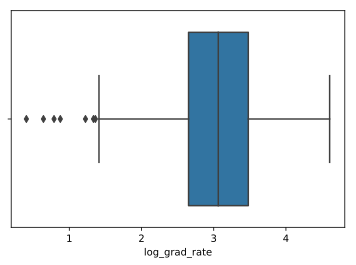

In [10]:
sns.boxplot(df['log_grad_rate'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


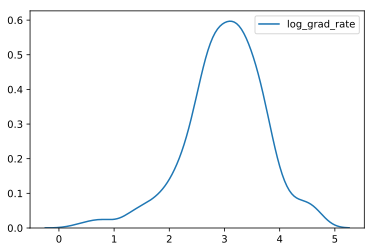

In [11]:
sns.kdeplot(df['log_grad_rate'])

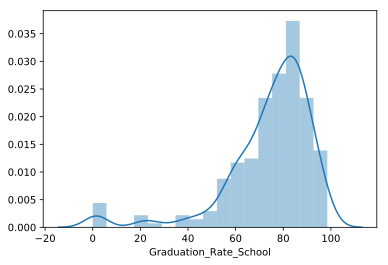

In [10]:
sns.distplot(df['Graduation_Rate_School'])

In [12]:
#Try removing outliers outside of 3 STD of the mean.
df['log_grad_rate'].mean()

3.013597725027226

In [13]:
df_remove_outliers = df[(np.abs(df.log_grad_rate-df.log_grad_rate.mean())
                        <= 3*df.log_grad_rate.std())]

In [14]:
df_remove_outliers.head()

Student_Count_Total  Zip_Mean_Income  Fully Accessible  \
0                 1739          53353.0                 0   
1                 1706          57770.0                 0   
2                  742          53353.0                 0   
3                  745          57770.0                 0   
4                  199          53353.0                 0   

   Generally accessible  Student_Count_Asian_perc  \
0                     1                     0.003   
1                     1                     0.006   
2                     0                     0.000   
3                     0                     0.000   
4                     0                     0.000   

   Student_Count_Asian_Pacific_Islander_perc  Student_Count_Black_perc  \
0                                        0.0                     0.033   
1                                        0.0                     0.031   
2                                        0.0                     0.032   
3                                        0.0                     0.019   
4                                        0.0                     0.774   

   Student_Count_English_Learners_perc  \
0                                0.190   
1                                0.201   
2                                0.228   
3                                0.286   
4                                0.010   

   Student_Count_Ethnicity_Not_Available_perc  \
0                                       0.006   
1                                       0.008   
2                                       0.000   
3                                       0.001   
4                                       0.000   

   Student_Count_Hawaiian_Pacific_Islander_perc  Student_Count_Hispanic_perc  \
0                                           0.0                        0.945   
1                                           0.0                        0.943   
2                                           0.0                        0.962   
3                                           0.0                        0.974   
4                                           0.0                        0.181   

   Student_Count_Low_Income_perc  Student_Count_Multi_perc  \
0                          0.954                     0.002   
1                          0.626                     0.004   
2                          0.970                     0.000   
3                          0.930                     0.000   
4                          0.874                     0.000   

   Student_Count_Native_American_perc  Student_Count_Other_Ethnicity_perc  \
0                               0.003                                 0.0   
1                               0.004                                 0.0   
2                               0.001                                 0.0   
3                               0.003                                 0.0   
4                               0.015                                 0.0   

   Student_Count_Special_Ed_perc  Student_Count_White_perc  \
0                          0.162                     0.007   
1                          0.162                     0.006   
2                          0.197                     0.004   
3                          0.196                     0.003   
4                          0.291                     0.030   

   Classroom_Languages_count  Blue  Brown  Green  Orange  Pink  Purple  Red  \
0                          2     1      0      0       0     1       0    1   
1                          2     1      0      0       0     1       0    1   
2                          1     1      0      0       1     1       0    0   
3                          1     1      0      0       1     1       0    0   
4                          0     0      0      0       0     0       0    0   

   Dress_Code_dummie  grades_offered_count  charter  gender_f_bn  \
0                  0                     4        0            0   
1                  0   

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


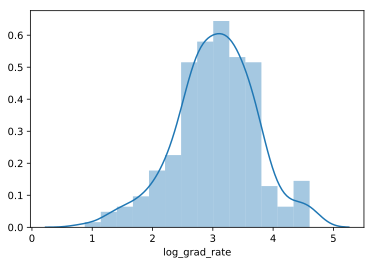

In [15]:
sns.distplot(df_remove_outliers['log_grad_rate'])

In [16]:
df_remove_outliers_2std = df[(np.abs(df.log_grad_rate-df.log_grad_rate.mean())
                        <= 2*df.log_grad_rate.std())]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


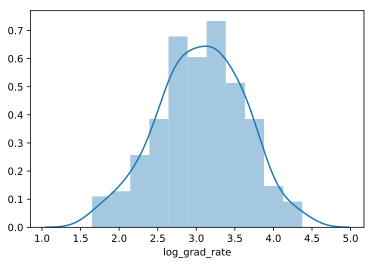

In [18]:
sns.distplot(df_remove_outliers_2std['log_grad_rate'])

## Correlation

In [29]:
df.corr()

Student_Count_Total  \
Student_Count_Total                                         1.000   
Zip_Mean_Income                                             0.372   
Fully Accessible                                           -0.024   
Generally accessible                                        0.117   
Student_Count_Asian_perc                                    0.450   
Student_Count_Asian_Pacific_Islander_perc                   0.190   
Student_Count_Black_perc                                   -0.439   
Student_Count_English_Learners_perc                        -0.022   
Student_Count_Ethnicity_Not_Available_perc                  0.201   
Student_Count_Hawaiian_Pacific_Islander_perc                0.272   
Student_Count_Hispanic_perc                                 0.250   
Student_Count_Low_Income_perc                              -0.405   
...                                                           ...   
Blue                                                        0.247   
Brown                                                       0.353   
Green                                                      -0.250   
Orange                                                      0.277   
Pink                                                        0.056   
Purple                                                      0.166   
Red                                                        -0.039   
Dress_Code_dummie                                          -0.335   
grades_offered_count                                        0.132   
charter                                                    -0.136   
gender_f_bn                                                -0.191   
log_grad_rate                                              -0.449   

                                              Zip_Mean_Income  \
Student_Count_Total                                     0.372   
Zip_Mean_Income                                         1.000   
Fully Accessible                                        0.040   
Generally accessible                                    0.059   
Student_Count_Asian_perc                                0.400   
Student_Count_Asian_Pacific_Islander_perc               0.153   
Student_Count_Black_perc                               -0.387   
Student_Count_English_Learners_perc                    -0.052   
Student_Count_Ethnicity_Not_Available_perc              0.242   
Student_Count_Hawaiian_Pacific_Islander_perc            0.355   
Student_Count_Hispanic_perc                             0.167   
Student_Count_Low_Income_perc                          -0.530   
...                                                       ...   
Blue                                                    0.447   
Brown                                                   0.409   
Green                                                  -0.180   
Orange                                                  0.048   
Pink                                                    0.127   
Purple                                                  0.407   
Red                                                     0.109   
Dress_Code_dummie                                      -0.372   
grades_offered_count                                    0.158   
charter                                                 0.011   
gender_f_bn                                            -0.089   
log_grad_rate                                          -0.378   

                                              Fully Accessible  \
Student_Count_Total                                     -0.024   
Zip_Mean_Income                                          0.040   
Fully Accessible                                         1.000   
Generally accessible                                    -0.678   
Student_Count_Asian_perc                                 0.189   
Student_Count_Asian_Pacific_Islander_perc                0.172   
Student_Count_Black_perc                                -0.229   
Student_Count_English_Learners_p

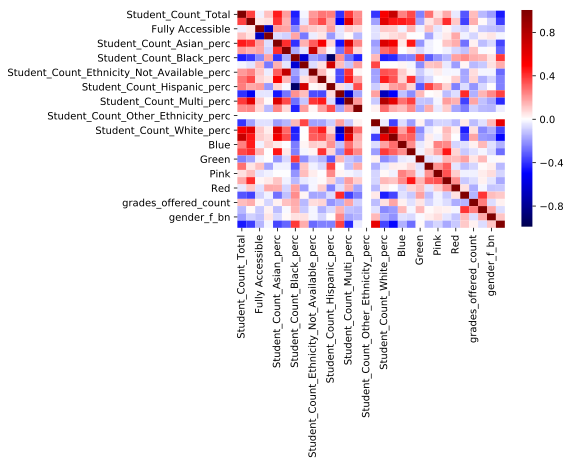

In [30]:
# example of a better corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);